Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [96]:
import random
from itertools import accumulate
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [97]:
UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2
MAX_STEPS = 30000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [98]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)



## Helper Functions

In [99]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def tweak(solution):
    new_solution = solution.copy()
    pos = random.randrange(NUM_SETS)
    new_solution[pos] = not new_solution[pos]
    return new_solution

#a basic tweak like the one above wouldn' t be able to explore all the solutions because
#when a set is turned from false to true the solution wouldn't be considered, because it costs more
#than the previous solution
def tweakytweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.5:
        index = random.randrange(NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution
    

## Have Fun!

In [100]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(33709.09519435164))

In [101]:
# A random solution with random 40% of the sets
solution = rng.random(NUM_SETS) < .4
valid(solution), cost(solution)

(np.True_, np.float64(13501.426004937872))

## Hill climber

  0%|          | 0/30000 [00:00<?, ?it/s]

(np.True_, np.float64(7258.919877884217), 230)

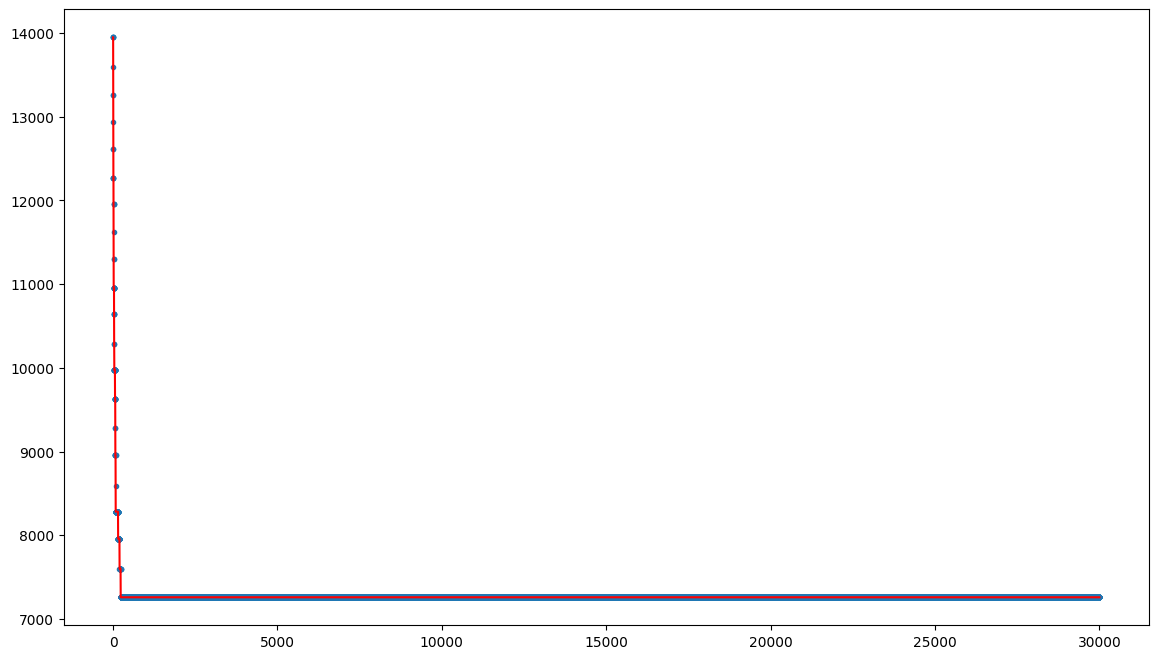

In [104]:
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
history = [cost(solution)]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = tweak(solution)
    history.append(cost(solution))
    if valid(new_solution) == np.True_:
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution), history.index(cost(solution))

## Hill climber with a bigger tweak

  0%|          | 0/30000 [00:00<?, ?it/s]

(np.True_, np.float64(6269.538266429896), 18177)

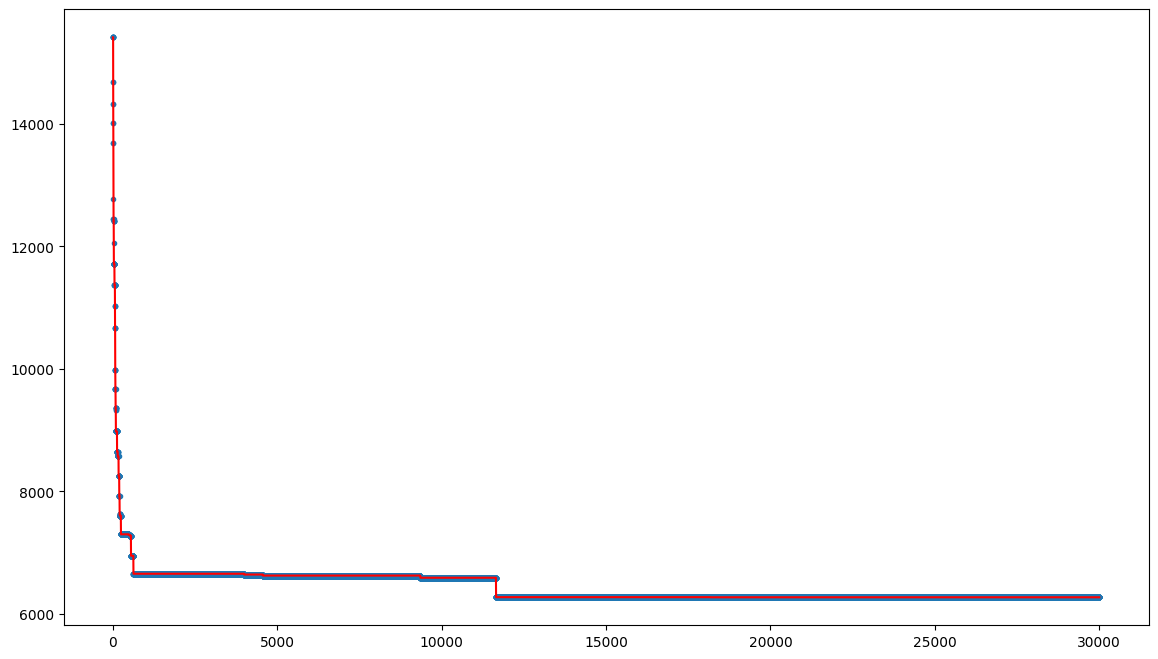

In [103]:
#for a universe with >1000 elements and >100 sets a solution with 50% of the sets included will be valid in most of the cases
#it's useless to start from all the sets, it could make sense only in the case with 10 sets and universe size of 100
solution = rng.random(NUM_SETS) < .5
while(valid(solution) == np.False_):
    solution = rng.random(NUM_SETS) < .5
history = [cost(solution)]
for i in tqdm(range(MAX_STEPS)):   
    new_solution = tweakytweak(solution)
    history.append(cost(solution))
    if valid(new_solution) == np.True_:
        #check the cost
        if cost(new_solution) < cost(solution):
            solution = new_solution
            
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

valid(solution), cost(solution), history.index(cost(solution))